<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Modules" data-toc-modified-id="Import-Modules-1">Import Modules</a></span></li><li><span><a href="#General-Outline" data-toc-modified-id="General-Outline-2">General Outline</a></span><ul class="toc-item"><li><span><a href="#Hypothesis:--Does-inclusion-of-consumer-confiden-index-(cci)-improve-model-prediction-score-for-sales?" data-toc-modified-id="Hypothesis:--Does-inclusion-of-consumer-confiden-index-(cci)-improve-model-prediction-score-for-sales?-2.1">Hypothesis:  Does inclusion of consumer confiden index (cci) improve model prediction score for sales?</a></span></li></ul></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-3">Import data</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-4">Data</a></span><ul class="toc-item"><li><span><a href="#Description-of-columns-and-values--" data-toc-modified-id="Description-of-columns-and-values---4.1">Description of columns and values -</a></span><ul class="toc-item"><li><span><a href="#--stores.csv" data-toc-modified-id="--stores.csv-4.1.1">- stores.csv</a></span></li><li><span><a href="#--train.csv" data-toc-modified-id="--train.csv-4.1.2">- train.csv</a></span></li><li><span><a href="#--test.csv" data-toc-modified-id="--test.csv-4.1.3">- test.csv</a></span></li><li><span><a href="#--features.csv" data-toc-modified-id="--features.csv-4.1.4">- features.csv</a></span></li><li><span><a href="#--Consumer-Confidence-Indicator" data-toc-modified-id="--Consumer-Confidence-Indicator-4.1.5">- Consumer Confidence Indicator</a></span></li></ul></li></ul></li><li><span><a href="#Consumer-Confidence-Index" data-toc-modified-id="Consumer-Confidence-Index-5">Consumer Confidence Index</a></span><ul class="toc-item"><li><span><a href="#Summary:" data-toc-modified-id="Summary:-5.1">Summary:</a></span></li></ul></li><li><span><a href="#Stores.csv-Data-Wrangling" data-toc-modified-id="Stores.csv-Data-Wrangling-6">Stores.csv Data Wrangling</a></span><ul class="toc-item"><li><span><a href="#Summary:" data-toc-modified-id="Summary:-6.1">Summary:</a></span></li></ul></li><li><span><a href="#Train.csv-Data-Wrangling" data-toc-modified-id="Train.csv-Data-Wrangling-7">Train.csv Data Wrangling</a></span><ul class="toc-item"><li><span><a href="#Summary:" data-toc-modified-id="Summary:-7.1">Summary:</a></span></li></ul></li><li><span><a href="#Features.csv-Data-Wrangling" data-toc-modified-id="Features.csv-Data-Wrangling-8">Features.csv Data Wrangling</a></span><ul class="toc-item"><li><span><a href="#Summary:" data-toc-modified-id="Summary:-8.1">Summary:</a></span></li></ul></li><li><span><a href="#Missing-Values-and-How-to-Deal-With" data-toc-modified-id="Missing-Values-and-How-to-Deal-With-9">Missing Values and How to Deal With</a></span></li><li><span><a href="#Merging-DataFrames" data-toc-modified-id="Merging-DataFrames-10">Merging DataFrames</a></span><ul class="toc-item"><li><span><a href="#Procedure:" data-toc-modified-id="Procedure:-10.1">Procedure:</a></span></li></ul></li></ul></div>

# Import Modules

In [941]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

%matplotlib inline

# General Outline

## Hypothesis:  Does inclusion of consumer confiden index (cci) improve model prediction score for sales?

Procedure:

1. Build and test model without cci data.
2. Build and test model with cci data.
3.  Compare and note differences between with/without cci data.

Download data

1.  consumer price index:  

four dataframes: 
- df_stores 
- df_features
- df_test
- df_train

# Import data

In [942]:
df_stores = pd.read_csv('./capstone 3 project data/stores.csv')

In [943]:
df_features = pd.read_csv('./capstone 3 project data/features.csv',
                        parse_dates = True, index_col='Date')

In [944]:
df_test = pd.read_csv('./capstone 3 project data/test.csv', parse_dates = True, index_col='Date')

In [945]:
df_train = pd.read_csv('./capstone 3 project data/train.csv', parse_dates = True, index_col='Date')

In [946]:
# https://data.oecd.org/leadind/consumer-confidence-index-cci.htm
df_cci = pd.read_csv('./capstone 3 project data/us_consumer_confidence.csv', 
                     parse_dates = True, index_col='TIME')

# Data

## Description of columns and values - 

from kaggle.com-

### - stores.csv

This file contains anonymized information about the 45 stores, indicating the type and size of store.

### - train.csv

This is the historical training data, which covers to 2010-02-05 to 2012-11-01. Within this file you will find the following fields:

Store - the store number <br>
Dept - the department number <br>
Date - the week <br>
Weekly_Sales -  sales for the given department in the given store <br>
IsHoliday - whether the week is a special holiday week <br>

### - test.csv

This file is identical to train.csv, except we have withheld the weekly sales. You must predict the sales for each triplet of store, department, and date in this file.

### - features.csv

This file contains additional data related to the store, department, and regional activity for the given dates. It contains the following fields:

Store - the store number <br>
Date - the week <br>
Temperature - average temperature in the region <br>
Fuel_Price - cost of fuel in the region <br>
MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA. <br>
CPI - the consumer price index <br>
Unemployment - the unemployment rate <br>
IsHoliday - whether the week is a special holiday week <br>
For convenience, the four holidays fall within the following weeks in the dataset (not all holidays are in the data):

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13 <br>
Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13 <br>
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13 <br>
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13 <br>

### - Consumer Confidence Indicator

from https://www.investopedia.com/insights/understanding-consumer-confidence-index/:

"Since consumer spending is so important to the nation's financial health, the Consumer Confidence Index is one of the most accurate and closely watched economic indicators. The index is based on a survey of five questions posed to 5,000 households, measuring their optimism on the economy's health."

Consumer Confidence Data from: https://data.oecd.org/leadind/consumer-confidence-index-cci.htm

LOCATION - Country ID <br>
INDICATOR -  Economic metric ID <br>
SUBJECT - <br>
MEASURE - <br>
FREQUENCY - time period of measurement reporting <br>
TIME - date <br>
Value - value of economic indicator <br>
Flag Codes - Code ID <br>

# Consumer Confidence Index

## Summary:

count	66.000000 <br>
mean	98.305140 <br>
std	0.693007 <br>
min	96.237700 <br>
25%	97.919050 <br>
50%	98.426900 <br>
75%	98.699375 <br>
max	99.228900 <br>


In [947]:
df_cci.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 308 entries, 2008-09-01 to 2021-06-01
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    308 non-null    object 
 1   INDICATOR   308 non-null    object 
 2   SUBJECT     308 non-null    object 
 3   MEASURE     308 non-null    object 
 4   FREQUENCY   308 non-null    object 
 5   Value       308 non-null    float64
 6   Flag Codes  0 non-null      float64
dtypes: float64(2), object(5)
memory usage: 19.2+ KB


In [948]:
df_cci.head(5)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,Flag Codes
TIME,,,,,,,
2008-09-01,OECD,CCI,AMPLITUD,LTRENDIDX,M,97.19665,NaN
2008-10-01,OECD,CCI,AMPLITUD,LTRENDIDX,M,96.88356,NaN
2008-11-01,OECD,CCI,AMPLITUD,LTRENDIDX,M,96.59681,NaN
2008-12-01,OECD,CCI,AMPLITUD,LTRENDIDX,M,96.42375,NaN
2009-01-01,OECD,CCI,AMPLITUD,LTRENDIDX,M,96.33321,NaN


In [949]:
# check for null/nan values
df_cci['LOCATION'].isna().sum()

0

In [950]:
# filter location for USA. values
df_cci = df_cci[df_cci['LOCATION'] == 'USA']
df_cci.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 154 entries, 2008-09-01 to 2021-06-01
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    154 non-null    object 
 1   INDICATOR   154 non-null    object 
 2   SUBJECT     154 non-null    object 
 3   MEASURE     154 non-null    object 
 4   FREQUENCY   154 non-null    object 
 5   Value       154 non-null    float64
 6   Flag Codes  0 non-null      float64
dtypes: float64(2), object(5)
memory usage: 9.6+ KB


In [951]:
df_cci.columns

Index(['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Value',
       'Flag Codes'],
      dtype='object')

In [952]:
df_cci = df_cci.rename(columns = {"Value":"cci_value"})
df_cci = df_cci.drop(columns = ['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY',
       'Flag Codes'])

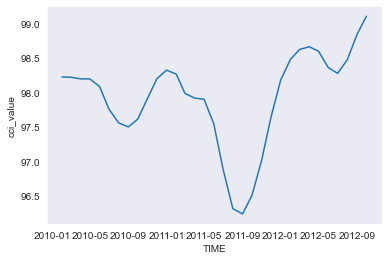

In [953]:
# filter for time period. drop all columns except 'VALUE'
df_ = df_cci.loc['2010-2-1':'2012-10-1']



sns.lineplot(x=df_.index, y=df_['cci_value']);

# Stores.csv Data Wrangling

## Summary:

Examine Type, Size values

1.  There are three store types.  Appear to be sorted by Size (square footage).  However, boxplots show one or two outliers in each type.  Maybe outlier stores should be reclassified? To be answered in exploratory data analysis.

    A.  Following stores identified as outliers in their respective Type:
    
    Type 'A':  Stores 33, 36.  Located outside lower bounds of Type 'B' distribution. Falls into Type 'C' size distribution bounds. <br>
    Type 'B':  Stores 5, 3.  Located outside lower bounds of Type 'B' distribution. Falls into Type 'C' size distribution bounds. <br>
    Type 'C':  Store 30.  Located outside upper bounds.  However, not large enough to qualify for B, C Type. <br>


2.  There are 22 'A' Type stores, 17 'B' Type stores, and 6 'C' Type Stores.
    Store Type will be an important feature going forward when analyzing feature relationship.  <br>


3.  Grouping the data by store type and computing median of each group

    A type store median size: 202406.0 <br>
    B type store median size: 114533.0 <br>
    C type store median size: 39910.0

In [954]:
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [955]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [956]:
#  inspect df_stores for missing, nan values.  no missing values
df_stores.isna().sum()

Store    0
Type     0
Size     0
dtype: int64

In [957]:
# "Type" Feature unique value counts
df_stores.Type.value_counts()

A    22
B    17
C     6
Name: Type, dtype: int64

In [958]:
print(df_stores[df_stores['Type'] == 'A'].describe())
print(df_stores[df_stores['Type'] == 'B'].describe())
print(df_stores[df_stores['Type'] == 'C'].describe())

           Store           Size
count  22.000000      22.000000
mean   22.227273  177247.727273
std    13.078269   49392.621098
min     1.000000   39690.000000
25%    11.500000  155840.750000
50%    25.000000  202406.000000
75%    32.750000  203819.000000
max    41.000000  219622.000000
           Store           Size
count  17.000000      17.000000
mean   18.352941  101190.705882
std    11.028039   32371.137916
min     3.000000   34875.000000
25%    10.000000   93188.000000
50%    17.000000  114533.000000
75%    23.000000  123737.000000
max    45.000000  140167.000000
           Store          Size
count   6.000000      6.000000
mean   39.000000  40541.666667
std     5.215362   1304.145033
min    30.000000  39690.000000
25%    37.250000  39745.000000
50%    40.000000  39910.000000
75%    42.750000  40774.000000
max    44.000000  42988.000000


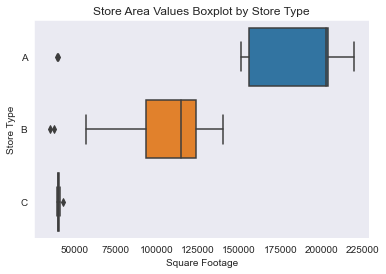

In [959]:
# Create a figure and axes
fig, ax = plt.subplots()

# Create a boxplot
sns.boxplot(data=df_stores,
         y='Type',
         x='Size')

# Create a more descriptive x axis label
ax.set(xlabel="Square Footage", ylabel='Store Type')

# Add the title
ax.set_title("Store Area Values Boxplot by Store Type")
plt.show();

In [960]:
# Two Type 'A' outliers:  Stores 33, 36.  Possible error in Type value?
df_stores[df_stores['Type'] == 'A'].sort_values('Size').head(5)

,Store,Type,Size
32,33,A,39690
35,36,A,39910
0,1,A,151315
25,26,A,152513
7,8,A,155078


In [961]:
# Two Type 'A' outliers:  Stores 5, 3.  Possible error in Type value?
df_stores[df_stores['Type'] == 'B'].sort_values('Size').head(5)

,Store,Type,Size
4,5,B,34875
2,3,B,37392
15,16,B,57197
6,7,B,70713
16,17,B,93188


In [962]:
df_stores[df_stores['Type'] == 'C'].sort_values('Size', ascending=False).head(2)

,Store,Type,Size
29,30,C,42988
42,43,C,41062


In [963]:
# each store type group shows some overlap with over store types in size values distribution.  
# there is a large difference between mean and median values for Type "A" store sizes.

print("A type store median size: {0} \nB type store median size: {1} \nC type store median size: {2}".format(
    df_stores[df_stores['Type'] == 'A']['Size'].median(), df_stores[df_stores['Type'] == 'B']['Size'].median(),
    df_stores[df_stores['Type'] == 'C']['Size'].median()))

A type store median size: 202406.0 
B type store median size: 114533.0 
C type store median size: 39910.0


# Train.csv Data Wrangling

## Summary:

Reindexed dataframe using Date.

1.  df_train shape: 421570, 4.  421,570 entries.  4 Features.
    A.  Categorical: Store, Department, IsHoliday
    B.  Numerical:  Weekly_Sales
2.  No missing/NaN values found.
3.  There are 81 unique values for Dept. feature
4.  Date range: 2010-02-05 thru 2012-10-26


In [964]:
# df_train shape: 421570 entries, 4 Features

print("df_train shape: {}".format(df_train.shape))
df_train.head(), df_train.tail()

df_train shape: (421570, 4)


(            Store  Dept  Weekly_Sales  IsHoliday
 Date                                            
 2010-02-05      1     1      24924.50      False
 2010-02-12      1     1      46039.49       True
 2010-02-19      1     1      41595.55      False
 2010-02-26      1     1      19403.54      False
 2010-03-05      1     1      21827.90      False,
             Store  Dept  Weekly_Sales  IsHoliday
 Date                                            
 2012-09-28     45    98        508.37      False
 2012-10-05     45    98        628.10      False
 2012-10-12     45    98       1061.02      False
 2012-10-19     45    98        760.01      False
 2012-10-26     45    98       1076.80      False)

In [965]:
# check info.  check for missing/nan values.  no missing/nan values found.
df_train.info()
df_train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Weekly_Sales  421570 non-null  float64
 3   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2)
memory usage: 13.3 MB


Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [966]:
# change Dept and Store values to category type.  The feature values do not reflect a measurable quantity.

df_train.Dept = df_train.Dept.astype('category')
df_train.Store = df_train.Store.astype('category')

In [967]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Store         421570 non-null  category
 1   Dept          421570 non-null  category
 2   Weekly_Sales  421570 non-null  float64 
 3   IsHoliday     421570 non-null  bool    
dtypes: bool(1), category(2), float64(1)
memory usage: 7.6 MB


In [968]:
# How many unique 'Dept' values?
print("There are {} unique values in 'Dept' feature".format(df_train.Dept.nunique()))

# value counts for each Dept
df_train.Dept.value_counts()


There are 81 unique values in 'Dept' feature


1     6435
10    6435
38    6435
21    6435
67    6435
      ... 
78     235
77     150
65     143
39      16
43      12
Name: Dept, Length: 81, dtype: int64

In [969]:
# which departments are found in a store?  

def dept_count(store_num):
    return df_train[df_train['Store'] == store_num]['Dept'].nunique()


In [970]:
list_ = df_train.Store.value_counts().keys().tolist()
list_
num_ = [dept_count(x) for x in list_]

uhhh = pd.DataFrame(list(zip(list_,num_)), columns = ['store', 'dept_count'])
uhhh.count()

order_ = uhhh.sort_values('dept_count').store

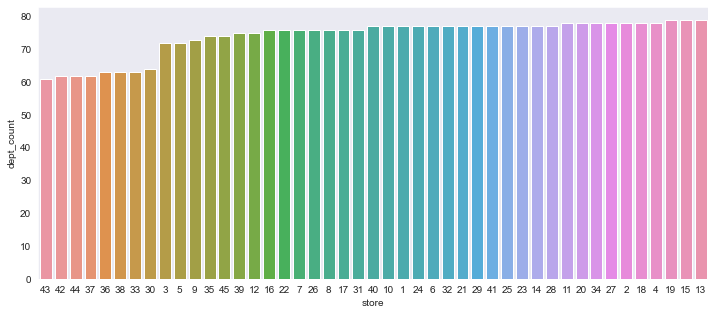

In [971]:
# countplot of depts in each store
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(data=uhhh, x='store',
         y='dept_count', order = order_ )

plt.show();


In [972]:
order_dept = df_train.Dept.value_counts().sort_values().keys().to_list()

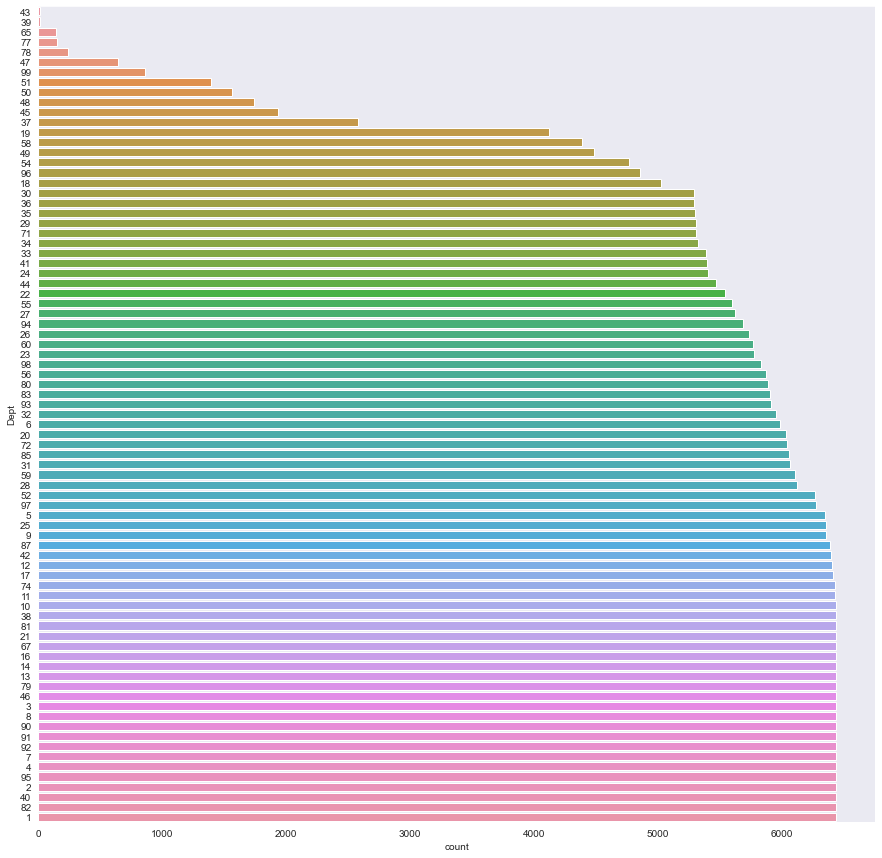

In [973]:
# Show a countplot 
fig, ax = plt.subplots(figsize=(15,15))
sns.countplot(data=df_train,
         y="Dept", order=order_dept)

plt.show();


Checking Holiday Periods are Marked Correctly

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13 
Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13 
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13 
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13 

In [974]:
# dates correctly matching IsHoliday == True values
df_train.query('IsHoliday == True').groupby('Date').count()


,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-12,2956,2956,2956,2956
2010-09-10,2937,2937,2937,2937
2010-11-26,2938,2938,2938,2938
2010-12-31,2943,2943,2943,2943
2011-02-11,2938,2938,2938,2938
2011-09-09,2958,2958,2958,2958
2011-11-25,3021,3021,3021,3021
2011-12-30,3003,3003,3003,3003
2012-02-10,3001,3001,3001,3001


In [975]:
df_train

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False
...,...,...,...,...
2012-09-28,45,98,508.37,False
2012-10-05,45,98,628.10,False
2012-10-12,45,98,1061.02,False


In [976]:
df_train['IsHoliday'] = df_train['IsHoliday'].astype(int)
df_train.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,0
2010-02-12,1,1,46039.49,1
2010-02-19,1,1,41595.55,0
2010-02-26,1,1,19403.54,0
2010-03-05,1,1,21827.90,0


# Features.csv Data Wrangling

## Summary:

Reindexed dataframe using Date.  

1.  df_train shape: (8190, 11).  8,190 entries.  11 Features. <br>
    A.  Categorical: Store, IsHoliday <br>
    B.  Numerical:  Temperature, Fuel_Price, MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5, CPI, Unemployment
2.  Date ranges from 2010-02-05 thru 2013-07-26.  Training.csv and Features.csv date ranges are not exact match.  Feature entries size will be adjust to match training set. <br>
3.  MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5 have significant amount of NaN values.  Boxplot and histogram plots of each features

 

In [977]:
# Note datetime index range
print(df_features.shape)
df_features.info()

(8190, 11)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8190 entries, 2010-02-05 to 2013-07-26
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Temperature   8190 non-null   float64
 2   Fuel_Price    8190 non-null   float64
 3   MarkDown1     4032 non-null   float64
 4   MarkDown2     2921 non-null   float64
 5   MarkDown3     3613 non-null   float64
 6   MarkDown4     3464 non-null   float64
 7   MarkDown5     4050 non-null   float64
 8   CPI           7605 non-null   float64
 9   Unemployment  7605 non-null   float64
 10  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1)
memory usage: 711.8 KB


In [978]:
# drop entries outside not in 2010-02-05 to 2012-10-26

df_features = df_features.loc['2010-02-05':'2012-10-26']

In [979]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Temperature   6435 non-null   float64
 2   Fuel_Price    6435 non-null   float64
 3   MarkDown1     2280 non-null   float64
 4   MarkDown2     1637 non-null   float64
 5   MarkDown3     2046 non-null   float64
 6   MarkDown4     1965 non-null   float64
 7   MarkDown5     2295 non-null   float64
 8   CPI           6435 non-null   float64
 9   Unemployment  6435 non-null   float64
 10  IsHoliday     6435 non-null   bool   
dtypes: bool(1), float64(9), int64(1)
memory usage: 559.3 KB


# Missing Values and How to Deal With

In [980]:
# Percentage of values for each features that are missing
df_features.isna().sum()/8190 * 100

Store            0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       50.732601
MarkDown2       58.583639
MarkDown3       53.589744
MarkDown4       54.578755
MarkDown5       50.549451
CPI              0.000000
Unemployment     0.000000
IsHoliday        0.000000
dtype: float64

In [981]:
# stats omit NaN values in each columns
df_features[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].describe()

,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
count,2280.000000,1637.000000,2046.000000,1965.000000,2295.000000
mean,6855.587430,3218.965504,1349.853021,3303.858142,4435.262240
std,8183.310015,9268.082387,9287.242800,6211.203947,5868.933325
min,0.270000,-265.760000,-29.100000,0.220000,135.160000
25%,1679.190000,37.200000,4.700000,483.270000,1702.565000
50%,4972.590000,187.040000,22.700000,1419.420000,3186.520000
75%,8873.582500,1785.290000,99.987500,3496.080000,5422.080000
max,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000


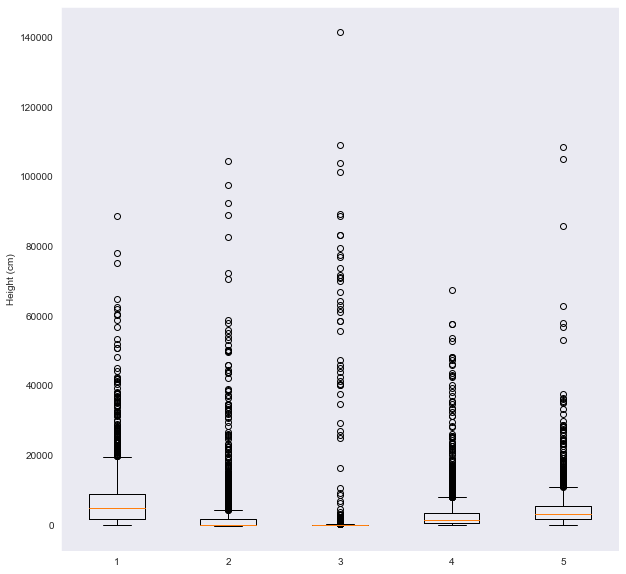

In [982]:
# A Boxplot of MarkDown values
#Basic boxplot

fig, ax = plt.subplots(figsize=(10,10))

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([df_features['MarkDown1'].dropna(), df_features['MarkDown2'].dropna(), 
            df_features['MarkDown3'].dropna(), df_features['MarkDown4'].dropna(),
           df_features['MarkDown5'].dropna()])

# Add x-axis tick labels:
#ax.set_xticklabels(["Rowing", "Gymnastics"])

# Add a y-axis label
ax.set_ylabel('Height (cm)')

plt.show()

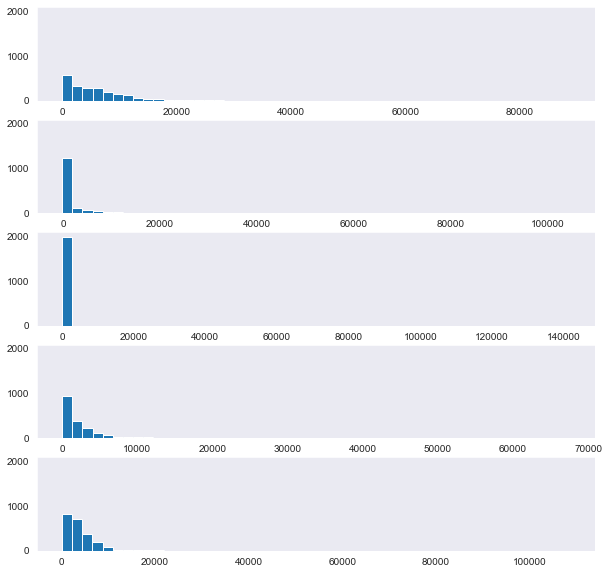

In [983]:
# MarkDown Histograms:  Distribution normal?

# Create a Figure and an array of subplots with 5 rows
fig, ax = plt.subplots(5,1, figsize=(10,10), sharey=True)


ax[0].hist(df_features["MarkDown1"], bins=50)

ax[1].hist(df_features["MarkDown2"], bins=50)

ax[2].hist(df_features["MarkDown3"], bins=50)

ax[3].hist(df_features["MarkDown4"], bins=50)

ax[4].hist(df_features["MarkDown5"], bins=50)

plt.show()

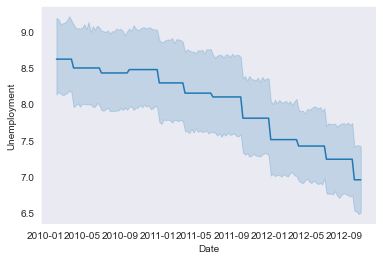

In [984]:
# Unemployment Rate Plot

sns.lineplot(data = df_features, x=df_features.index, y = 'Unemployment' )
plt.show()

# Merging DataFrames

## Procedure:

1.  Start with training set.  Merge with stores. --> df_

2.  merge df_ and df_cci --> df_1

3.  merge df_1 and df_features --> df_2

4.  clean up unneeded columns.



In [985]:
print("df_train shape: {}".format(df_train.shape))

df_train.head()

df_train shape: (421570, 4)


,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,0
2010-02-12,1,1,46039.49,1
2010-02-19,1,1,41595.55,0
2010-02-26,1,1,19403.54,0
2010-03-05,1,1,21827.90,0


In [986]:
df_train = df_train.reset_index()
df_train


,Date,Store,Dept,Weekly_Sales,IsHoliday
0,2010-02-05,1,1,24924.50,0
1,2010-02-12,1,1,46039.49,1
2,2010-02-19,1,1,41595.55,0
3,2010-02-26,1,1,19403.54,0
4,2010-03-05,1,1,21827.90,0
...,...,...,...,...,...
421565,2012-09-28,45,98,508.37,0
421566,2012-10-05,45,98,628.10,0
421567,2012-10-12,45,98,1061.02,0
421568,2012-10-19,45,98,760.01,0


In [987]:
# add isocalendar value 
df_train['isocalendar']= df_train['Date'].apply(lambda x: x.isocalendar()[0:2])
df_train.head()

,Date,Store,Dept,Weekly_Sales,IsHoliday,isocalendar
0,2010-02-05,1,1,24924.50,0,"(2010, 5)"
1,2010-02-12,1,1,46039.49,1,"(2010, 6)"
2,2010-02-19,1,1,41595.55,0,"(2010, 7)"
3,2010-02-26,1,1,19403.54,0,"(2010, 8)"
4,2010-03-05,1,1,21827.90,0,"(2010, 9)"


In [988]:
# Merge df_train and df_stores
df_stores.head()
df_ = df_train.merge(df_stores, how='left')
df_

,Date,Store,Dept,Weekly_Sales,IsHoliday,isocalendar,Type,Size
0,2010-02-05,1,1,24924.50,0,"(2010, 5)",A,151315
1,2010-02-12,1,1,46039.49,1,"(2010, 6)",A,151315
2,2010-02-19,1,1,41595.55,0,"(2010, 7)",A,151315
3,2010-02-26,1,1,19403.54,0,"(2010, 8)",A,151315
4,2010-03-05,1,1,21827.90,0,"(2010, 9)",A,151315
...,...,...,...,...,...,...,...,...
421565,2012-09-28,45,98,508.37,0,"(2012, 39)",B,118221
421566,2012-10-05,45,98,628.10,0,"(2012, 40)",B,118221
421567,2012-10-12,45,98,1061.02,0,"(2012, 41)",B,118221
421568,2012-10-19,45,98,760.01,0,"(2012, 42)",B,118221


In [989]:
# reset consumer confidence index dataframe index
df_cci = df_cci.reset_index()

In [990]:
df_cci['isocalendar']= df_cci['TIME'].apply(lambda x: x.isocalendar()[0:2])
df_cci

,TIME,cci_value,isocalendar
0,2008-09-01,96.87313,"(2008, 36)"
1,2008-10-01,96.46582,"(2008, 40)"
2,2008-11-01,96.16968,"(2008, 44)"
3,2008-12-01,96.16106,"(2008, 49)"
4,2009-01-01,96.16938,"(2009, 1)"
...,...,...,...
149,2021-02-01,99.14902,"(2021, 5)"
150,2021-03-01,99.56915,"(2021, 9)"
151,2021-04-01,99.86069,"(2021, 13)"
152,2021-05-01,99.81796,"(2021, 17)"


In [991]:
# merge df_ and df_cci

df_1 = df_.merge(df_cci, how='left', on='isocalendar')

In [992]:
df_1.head()

,Date,Store,Dept,Weekly_Sales,IsHoliday,isocalendar,Type,Size,TIME,cci_value
0,2010-02-05,1,1,24924.50,0,"(2010, 5)",A,151315,2010-02-01,98.22324
1,2010-02-12,1,1,46039.49,1,"(2010, 6)",A,151315,NaT,NaN
2,2010-02-19,1,1,41595.55,0,"(2010, 7)",A,151315,NaT,NaN
3,2010-02-26,1,1,19403.54,0,"(2010, 8)",A,151315,NaT,NaN
4,2010-03-05,1,1,21827.90,0,"(2010, 9)",A,151315,2010-03-01,98.21968


In [993]:
df_1['cci_value'] = blah.Value.fillna(method="ffill")

df_1

,Date,Store,Dept,Weekly_Sales,IsHoliday,isocalendar,Type,Size,TIME,cci_value
0,2010-02-05,1,1,24924.50,0,"(2010, 5)",A,151315,2010-02-01,98.22324
1,2010-02-12,1,1,46039.49,1,"(2010, 6)",A,151315,NaT,98.22324
2,2010-02-19,1,1,41595.55,0,"(2010, 7)",A,151315,NaT,98.22324
3,2010-02-26,1,1,19403.54,0,"(2010, 8)",A,151315,NaT,98.22324
4,2010-03-05,1,1,21827.90,0,"(2010, 9)",A,151315,2010-03-01,98.21968
...,...,...,...,...,...,...,...,...,...,...
421565,2012-09-28,45,98,508.37,0,"(2012, 39)",B,118221,NaT,98.84049
421566,2012-10-05,45,98,628.10,0,"(2012, 40)",B,118221,2012-10-01,99.10398
421567,2012-10-12,45,98,1061.02,0,"(2012, 41)",B,118221,NaT,99.10398
421568,2012-10-19,45,98,760.01,0,"(2012, 42)",B,118221,NaT,99.10398


In [994]:
df_features = df_features.reset_index()
df_features

,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,2010-02-05,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,2010-02-12,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,2010-02-19,1,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,2010-02-26,1,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,2010-03-05,1,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,2012-09-28,45,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False
6431,2012-10-05,45,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False
6432,2012-10-12,45,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False
6433,2012-10-19,45,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False


In [995]:
df_features['isocalendar'] = df_features['Date'].apply(lambda x: x.isocalendar()[0:2])

In [996]:
df_features

,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,isocalendar
0,2010-02-05,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,"(2010, 5)"
1,2010-02-12,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,"(2010, 6)"
2,2010-02-19,1,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,"(2010, 7)"
3,2010-02-26,1,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,"(2010, 8)"
4,2010-03-05,1,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,"(2010, 9)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,2012-09-28,45,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,"(2012, 39)"
6431,2012-10-05,45,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False,"(2012, 40)"
6432,2012-10-12,45,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False,"(2012, 41)"
6433,2012-10-19,45,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False,"(2012, 42)"


In [997]:
# merge df_1 and df_features on isocalendar

df_2 = df_1.merge(df_features, how='left')

In [998]:
df_2.sort_values(['Store', 'isocalendar'])

,Date,Store,Dept,Weekly_Sales,IsHoliday,isocalendar,Type,Size,TIME,cci_value,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,2010-02-05,1,1,24924.50,0,"(2010, 5)",A,151315,2010-02-01,98.22324,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
143,2010-02-05,1,2,50605.27,0,"(2010, 5)",A,151315,2010-02-01,98.22324,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
286,2010-02-05,1,3,13740.12,0,"(2010, 5)",A,151315,2010-02-01,98.22324,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
429,2010-02-05,1,4,39954.04,0,"(2010, 5)",A,151315,2010-02-01,98.22324,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
572,2010-02-05,1,5,32229.38,0,"(2010, 5)",A,151315,2010-02-01,98.22324,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421012,2012-10-26,45,93,2487.80,0,"(2012, 43)",B,118221,NaT,99.10398,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421146,2012-10-26,45,94,5203.31,0,"(2012, 43)",B,118221,NaT,99.10398,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421289,2012-10-26,45,95,56017.47,0,"(2012, 43)",B,118221,NaT,99.10398,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421434,2012-10-26,45,97,6817.48,0,"(2012, 43)",B,118221,NaT,99.10398,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [999]:
# check shape.  df_2 entries count equals training data entries count.

df_2.shape

(421570, 19)

In [1003]:
#drop 'TIME'

df_2 = df_2.drop(columns = 'TIME')

In [1007]:
df_2['Type'] = df_2['Type'].astype('category')

In [1008]:
df_2['Store'] = df_2['Store'].astype('category')

In [1011]:
df_2['Dept'] = df_2['Dept'].astype('category')

In [1013]:
df_2.to_csv('capstone_3_wrnglng_results')